In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()
# data

In [3]:
X = data['data']
y = data['target']

In [4]:
type(X)

numpy.ndarray

In [5]:
X.shape

(569, 30)

In [6]:
std = StandardScaler()
X = std.fit_transform(X)

In [11]:
cov = np.cov(X,rowvar=False)

In [12]:
cov.shape

(30, 30)

In [13]:
eigenVal, eigenVec = np.linalg.eig(cov)

In [14]:
eigenVal.shape, eigenVec.shape

((30,), (30, 30))

In [19]:
a = np.array([1,2,3,4,5])
a[[3,2,1]]

array([4, 3, 2])

In [15]:
sortind = np.argsort(eigenVal)[::-1]

In [16]:
eigenVec = eigenVec[:,sortind]

In [20]:
d = 2

In [21]:
egv = eigenVec[:,:d]

In [23]:
egv

array([[ 0.21890244, -0.23385713],
       [ 0.10372458, -0.05970609],
       [ 0.22753729, -0.21518136],
       [ 0.22099499, -0.23107671],
       [ 0.14258969,  0.18611302],
       [ 0.23928535,  0.15189161],
       [ 0.25840048,  0.06016536],
       [ 0.26085376, -0.0347675 ],
       [ 0.13816696,  0.19034877],
       [ 0.06436335,  0.36657547],
       [ 0.20597878, -0.10555215],
       [ 0.01742803,  0.08997968],
       [ 0.21132592, -0.08945723],
       [ 0.20286964, -0.15229263],
       [ 0.01453145,  0.20443045],
       [ 0.17039345,  0.2327159 ],
       [ 0.15358979,  0.19720728],
       [ 0.1834174 ,  0.13032156],
       [ 0.04249842,  0.183848  ],
       [ 0.10256832,  0.28009203],
       [ 0.22799663, -0.21986638],
       [ 0.10446933, -0.0454673 ],
       [ 0.23663968, -0.19987843],
       [ 0.22487053, -0.21935186],
       [ 0.12795256,  0.17230435],
       [ 0.21009588,  0.14359317],
       [ 0.22876753,  0.09796411],
       [ 0.25088597, -0.00825724],
       [ 0.12290456,

In [24]:
new_Data = X@egv

In [25]:
new_Data.shape

(569, 2)

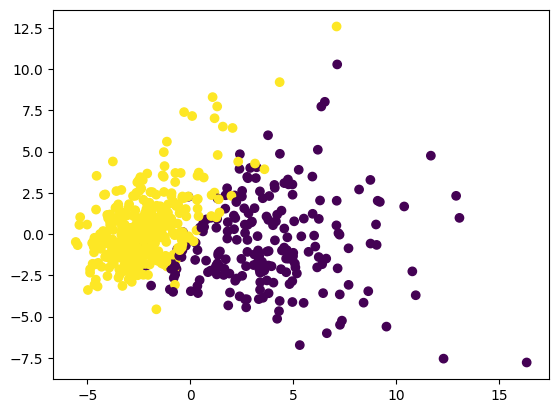

In [26]:
plt.scatter(new_Data[:,0],new_Data[:,1],c = y)

In [27]:
print(eigenVal[sortind]/np.sum(eigenVal))

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


In [28]:
print(np.cumsum(eigenVal[sortind])/np.sum(eigenVal))

[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=2)

In [54]:
newD = pca.fit_transform(X)

In [55]:
newD.shape

(569, 2)

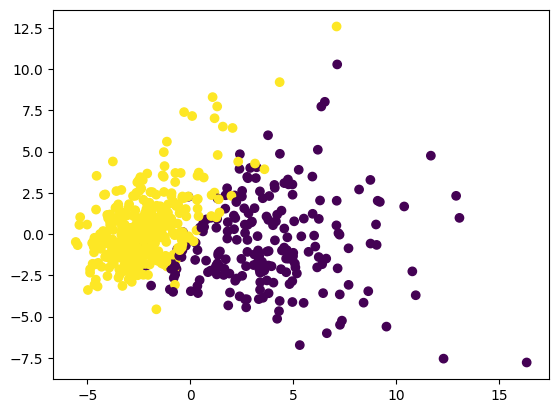

In [56]:
plt.scatter(newD[:,0],newD[:,1],c = y)

In [57]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [58]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

In [59]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])